# **SUPPLY CHAIN MANAGEMENT - PROJECT WORK**

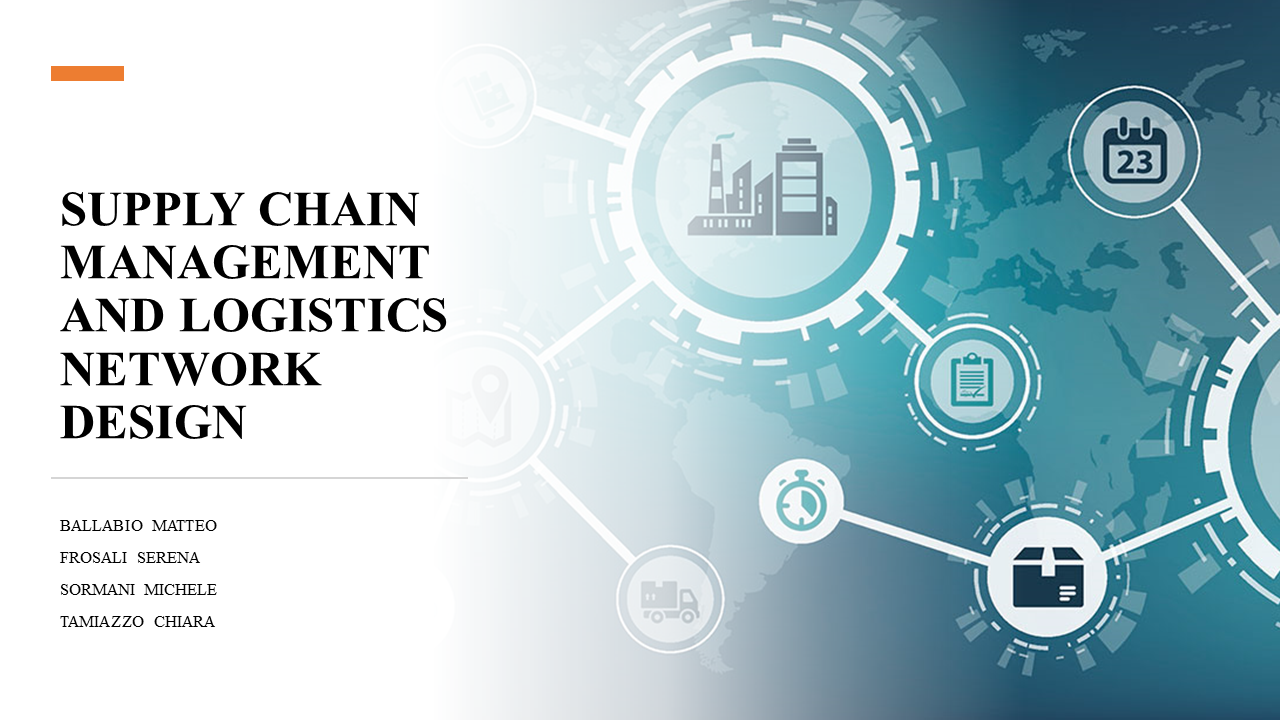

# **AS-IS**

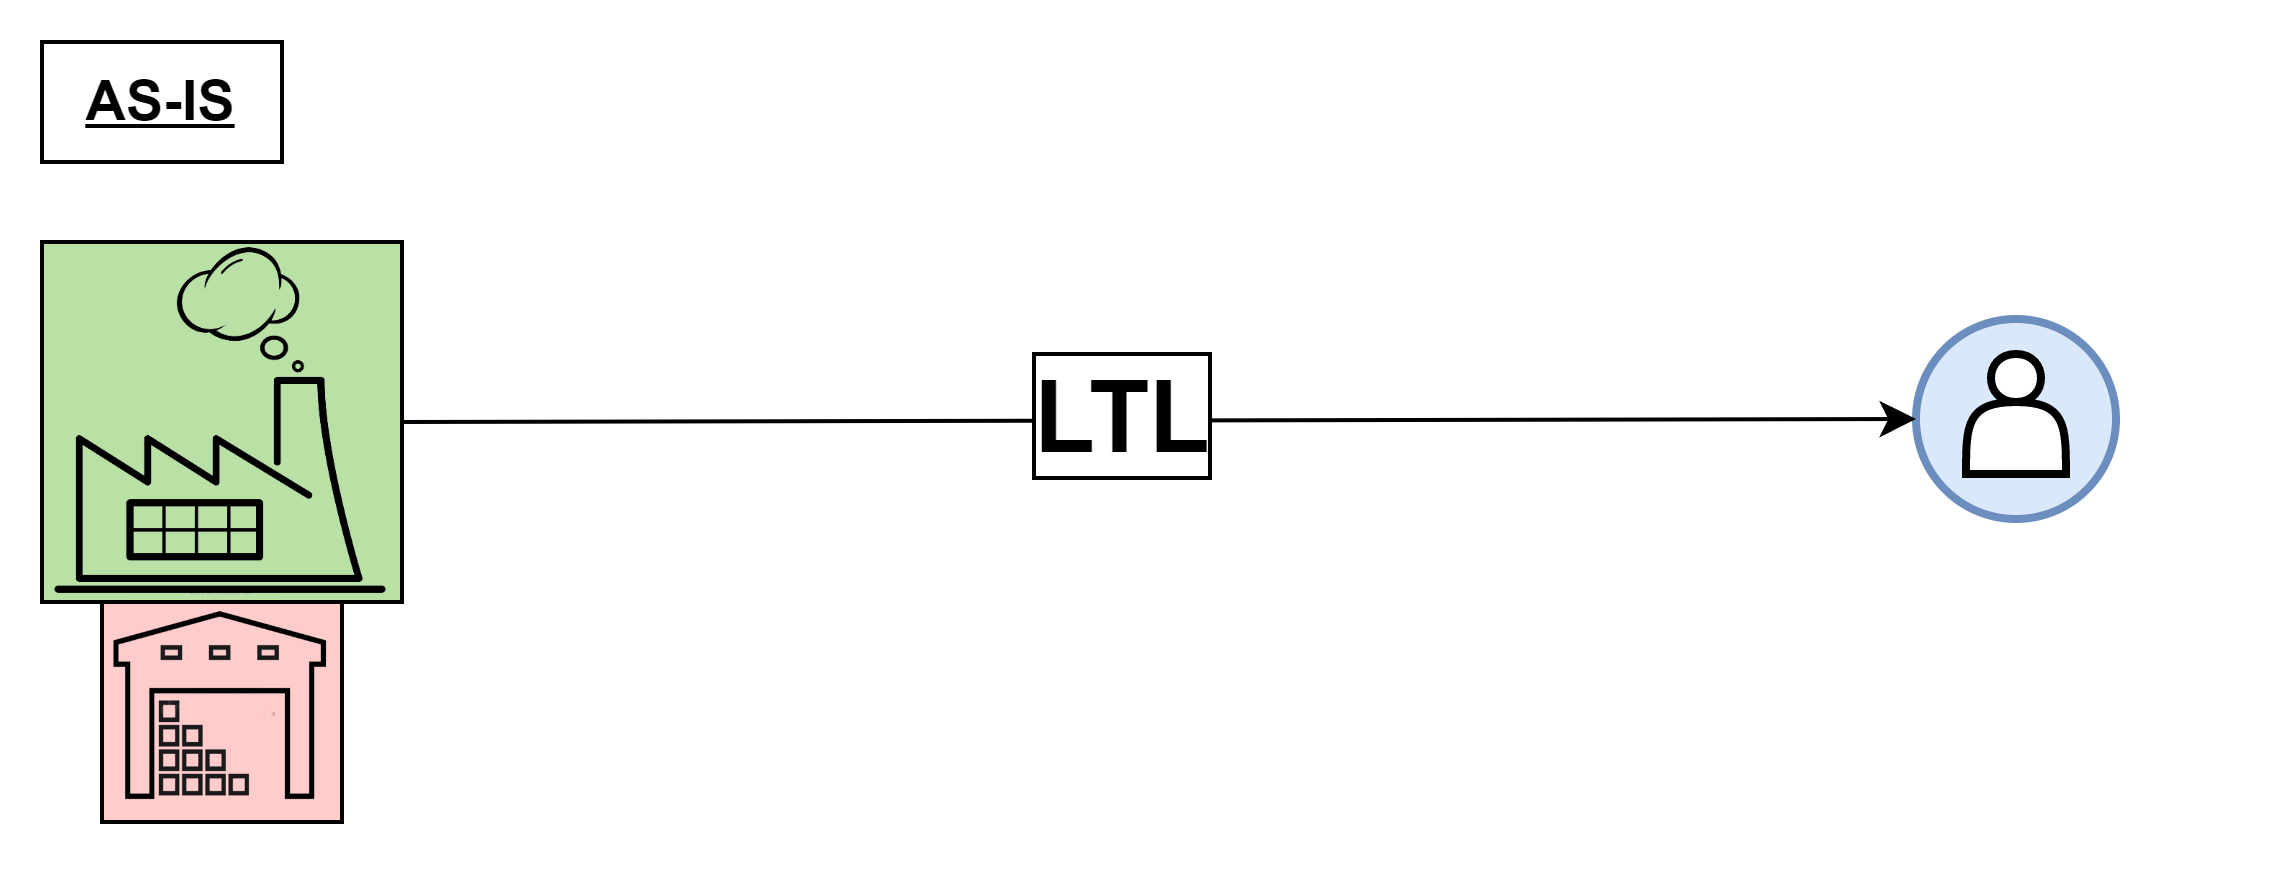

## Descrizione current state

#### **INFORMAZIONI – CURRENT STATE:**
 
- Bologna: magazzino e reparto produttivo (Distanza nulla tra factory e warehouse principale). 
- Logica LTL transportation. 
- C.u. di trasporto 0.1€/km.

Obiettivo: minimizzazione costi di trasporto. 

#### **INFORMAZIONI – FUTURE STATE:**

- Incremento domanda: 5%annuo per i 4 anni futuri. 
- Possibili siti logistici: 14 (incluso Bologna). 


### Considerazioni sulla domanda da soddisfare:

- TOTALE CAPACITA’ MAGAZZINO BOLOGNA INIZIALE = **7000**
- TOTALE DOMANDA SODDISFATTA DA BOLOGNA NEL 2022 = **6817**
- TOTALE DOMANDA DA SODDISFARE TUTTA ITALIA NEL 2022 = **16407**
- TOTALE DOMANDA DA SODDISFARE TUTTA ITALIA NEL 2026 = **19943**


**------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **CONSIDERAZIONI PER VALUTARE IMPLEMENTAZIONI MIGLIORAMENTI**

## 1. Ha senso utilizzare la logica LTL per spedizioni tra PLANT e WAREHOUSE?

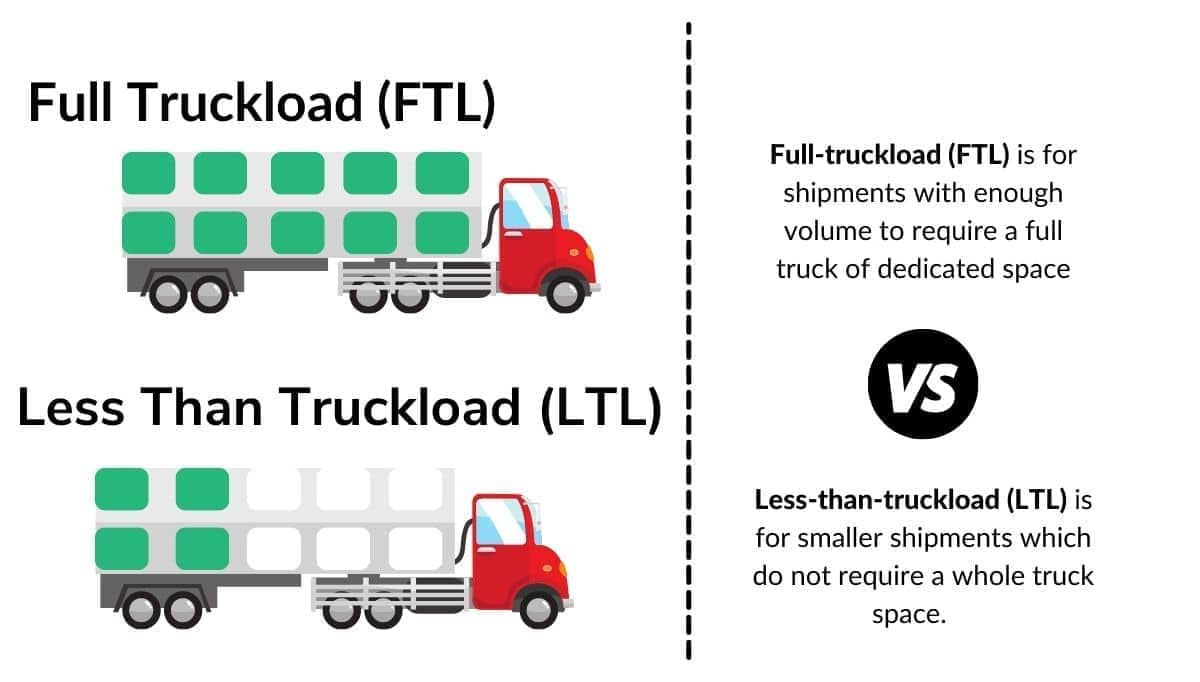

## 2. Qual è la combinazione di warehouses tale che permette di ottenere un COSTO TOTALE (fissi+trasporto) minore, con Bologna sempre aperta? 

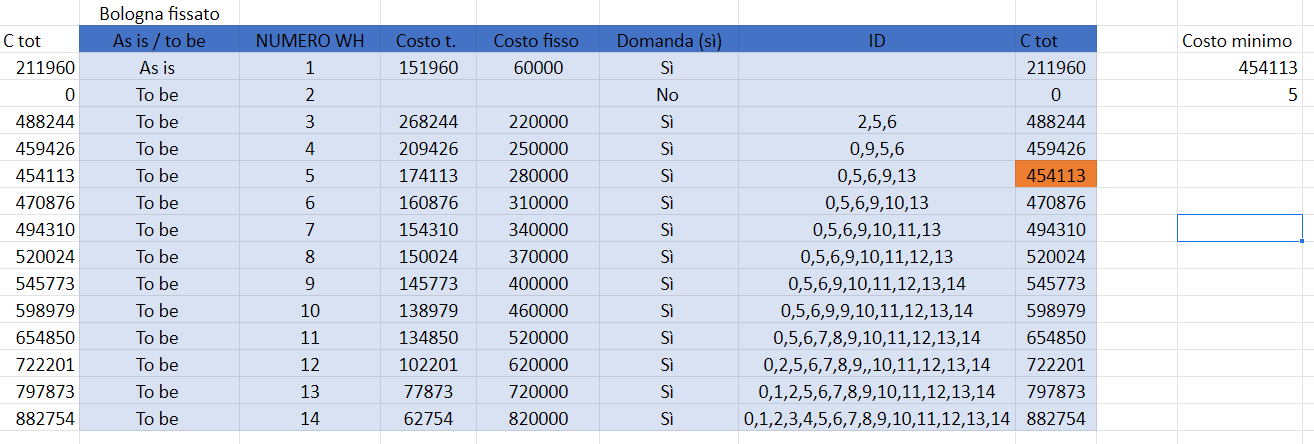

## 3. Come ottenere un bilanciamento della COPERTURA DELLA DOMANDA?

L'obiettivo sarebbe ottenere una situazione di bilanciamento in cui la domanda è concentrata al 50% in range spaziale e al 50% in un altro range spaziale.

es: 

- 50% tra 0-100 km
- 50% tra 100-200 km

Chiaramente più WAREHOUSES vengono aperte e più la distanza media tra WAREHOUSES E CLIENTE diminuisce. Però, teoricamente aprire una nuova WAREHOUSES comporta costi, così bisogna trovare un bilanciamento tra le due.

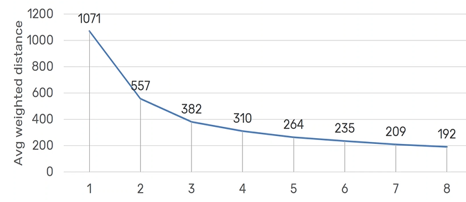

# **TO-BE 1**

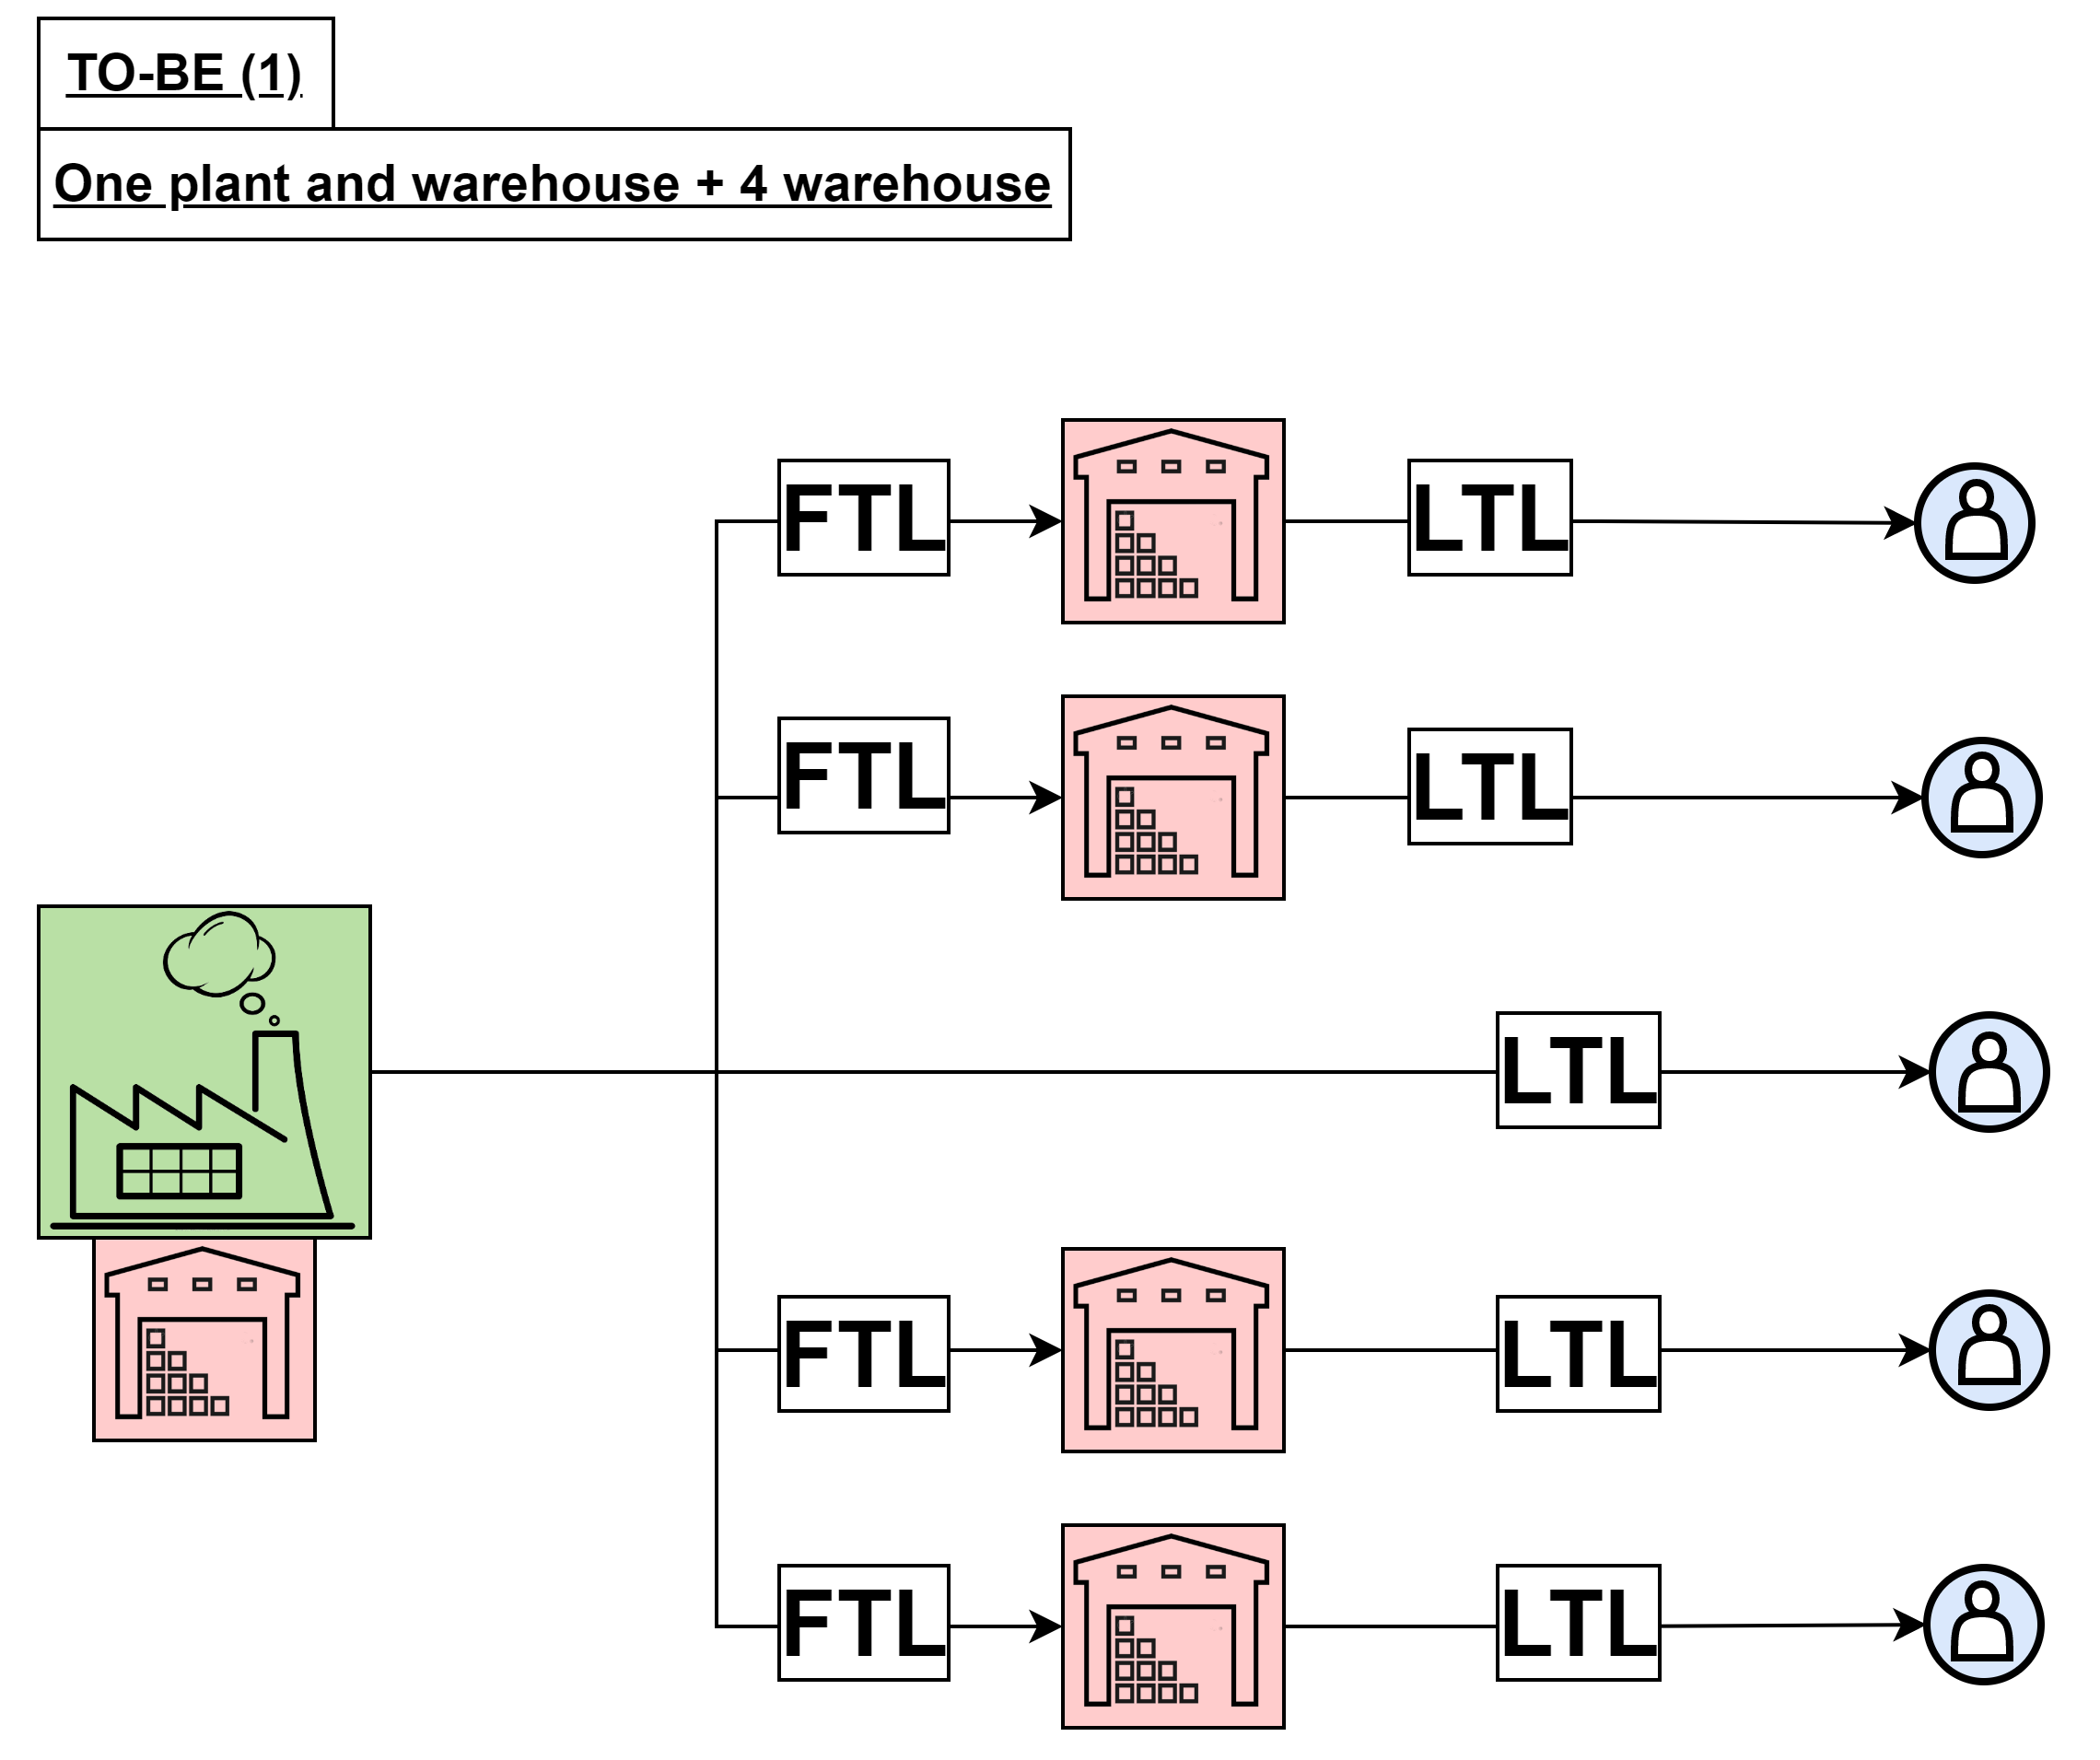

## Descrizione dell'implementazione 1

“NUMERO E LOCALIZZAZIONE OTTIMA WAREHOUSE BASATA SU MINIMIZZAZIONE COSTI FISSI”

Numero warehouse=5

- 5 esiste già (Bologna)  X
- 0: Genova, già a Nord  X
- 6: Roma con alto livello di domanda. 
- 9: Andria (piuttosto isolata ma da valutare)
- 13: Catania (piuttosto isolata ma da valutare)

### **IDEA DI NON APRIRE NESSUN NUOVO PLANT, MA SOLO 5 WAREHOUSE (spedizione da PLANT a WAREHOUSE con FTL)**

- PLANT → PLANT: FTL tra Bologna e Roma (Plant e Warehouse) con ROTAIA o TRUK FTL 
- PLANT → WAREHOUSE: WAREHOUSE tra PLANT e Warehouse FTL oppure LTL (?) + FTL Bologna-Genoa
- WAREHOUSE → CLIENTI: LTL tra warehouse e clienti

## PRO e CONTRO alternativa 1

### Pro:

- Non ho COSTI D'INVESTIMENTO
- Abbassamento dei costi di trasporto se utilizzo logica FTL e se uso il trasporto su rotaia.

### Contro:

- In caso di blocco impianti BOLOGNA, potremmo non riuscire a servire i clienti
- Livello di servizio ai clienti minore in quanto non c'è un stablimento dedicato esclusivamente al sud-Italia.

# **TO-BE 2**

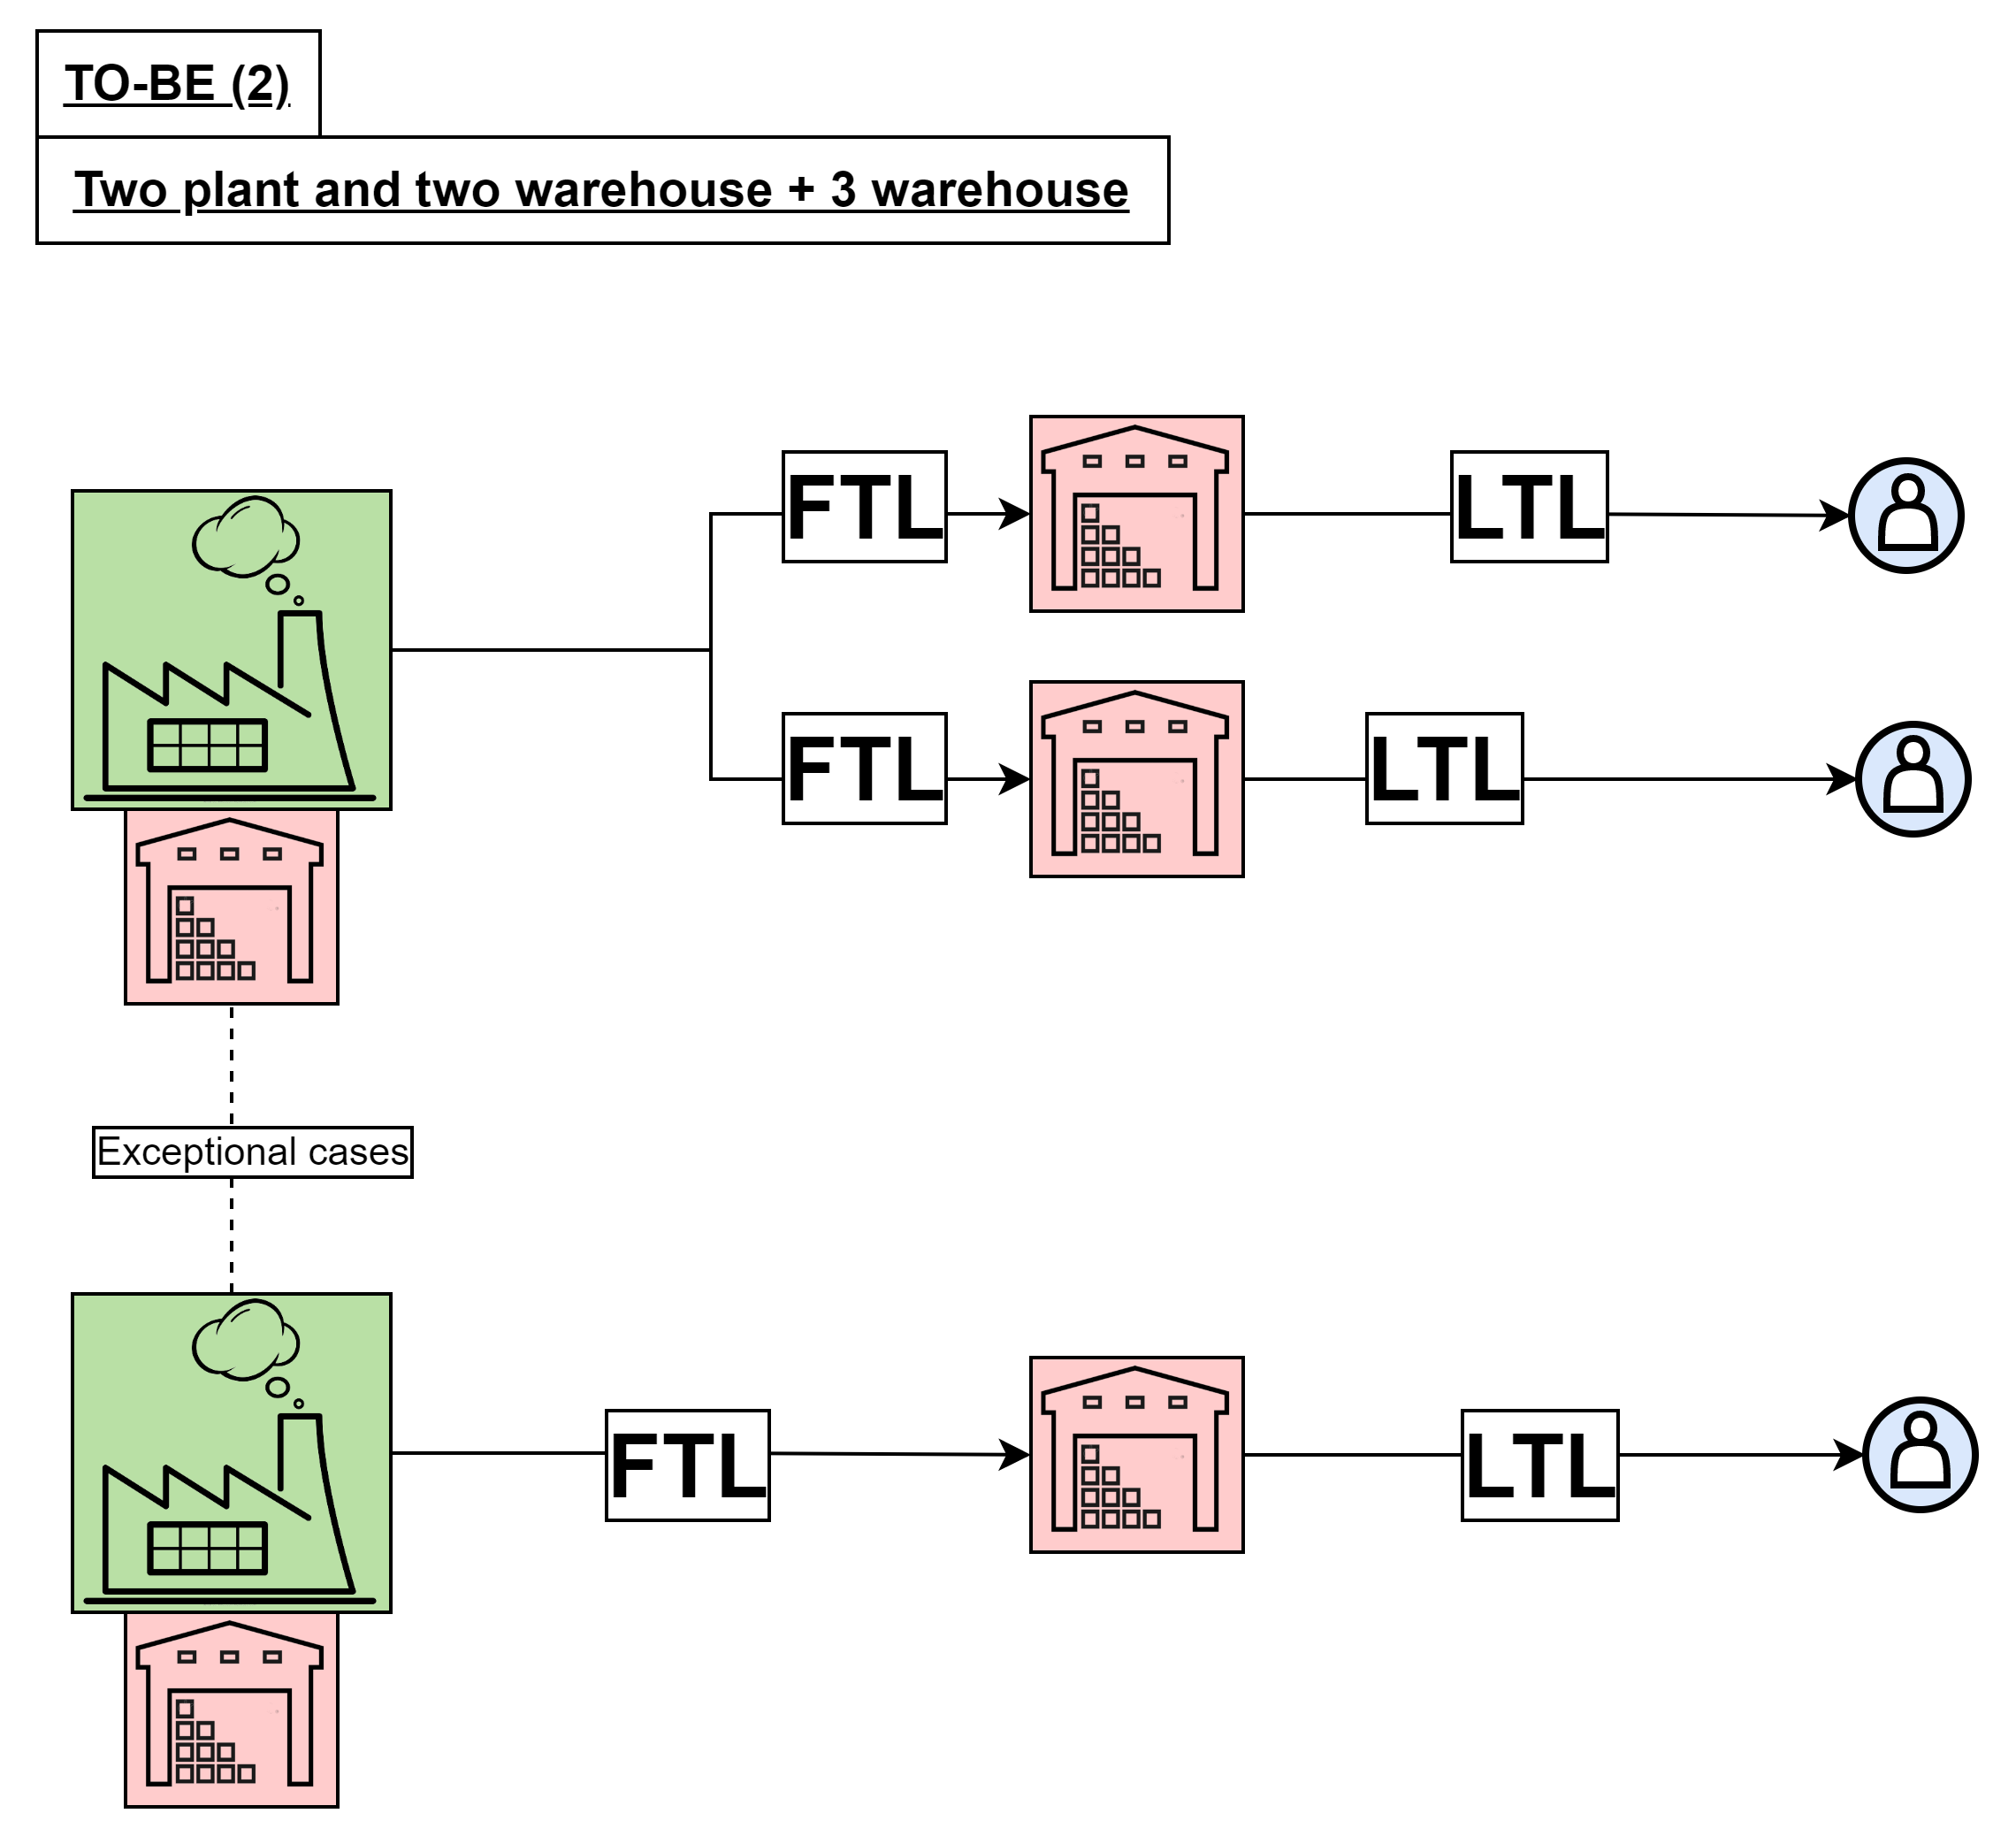



---



## Descrizione dell'implementazione 2

“NUMERO E LOCALIZZAZIONE OTTIMA WAREHOUSE BASATA SU MINIMIZZAZIONE COSTI FISSI”

Numero warehouse=5

- 5 esiste già (Bologna)  X
- 0: Genova, già a Nord  X
- 6: Roma con alto livello di domanda. 
- 9: Andria (piuttosto isolata ma da valutare)
- 13: Catania (piuttosto isolata ma da valutare)

### **IDEA DI FARE UN PLANT+WAREHOUSE A ROMA CON FTL**

- PLANT → PLANT: FTL tra Bologna e Roma (Plant e Warehouse) con ROTAIA o TRUK FTL 
- PLANT → WAREHOUSE: WAREHOUSE tra PLANT e Warehouse FTL oppure LTL (?) + FTL Bologna-Genoa
- WAREHOUSE → CLIENTI: LTL tra warehouse e clienti

#### Perchè eliminate le altre di siti produttivi alternative?

- Genova, si trova a NORD e quindi c’è già Bologna. L’idea sarebbe avere un sito produttivo più dedicato al sud italia per garantire un maggior servizio. Inoltre, Genova collgata male a Bologna infattai DISTANCE MATRIX=191km, mentre REAL DISTANCE=295km (perchè i due plant in via eccezionale dovrebbero essere collegati in maniera veloce per emergenze).
- Andria e Catania, anche se sono città del meridionali, sono città isolate quindi per motivi trasporti e geografici sono mal collegabili. Inoltre, un through put abbastanza basso rispetto alle altre. Inteso, che la domanda sarebbe circa 1500 unità ciascuno.

#### Supposizioni:
- distanza Roma-Bologna : 353km
- costi del Trasporto Rotaia ANDATA FTL: 17.650€/tratta
- costi del Trasporto Rotaia ANDATA LTL: 1342€/tratta

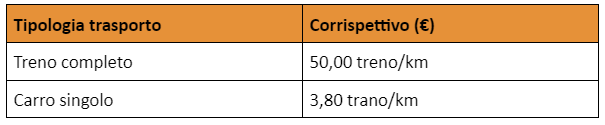


## Descrizione alternativa 2

### Pro:

- Dimuisce di molto la DISTANZA MASSIMA.
- Viene soddisfatta in modo più certa la domanda, poichè ho due stablimenti produttivi (in caso di guasto di uno, collegabili).
- Stablimento produttivo dedicato al Sud-Italia

### Contro:

- Costo di APERTURA NUOVO IMPIANTO certamente

# **Dependencies and Libraries**

In [1]:
!pip install plotly==5.6.0
!pip install shapely
!pip install intake-geopandas

     |████████████████████████████████| 27.7 MB 8.0 MB/s            
     |████████████████████████████████| 2.0 MB 7.9 MB/s            
     |████████████████████████████████| 1.0 MB 7.1 MB/s            
     |████████████████████████████████| 1.5 MB 60.4 MB/s            
     |████████████████████████████████| 6.3 MB 35.8 MB/s            
     |████████████████████████████████| 16.7 MB 56.9 MB/s            
     |████████████████████████████████| 1.1 MB 66.3 MB/s            
     |████████████████████████████████| 140 kB 50.4 MB/s            
     |████████████████████████████████| 596 kB 54.8 MB/s            
     |████████████████████████████████| 96 kB 17.9 MB/s            
     |████████████████████████████████| 55 kB 9.5 MB/s             


In [2]:
#%% Module
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pathlib

# Import functions
from netopt import netopt, print_solution, plot_map
from data_structures import (show_data, set_capacity, set_all_capacities, set_fixed_cost,
                             set_all_fixed_costs, scale_demand, scale_all_demands, set_demand,
                             set_all_demands, calculate_dm)
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

# Import data
# The variable customers_as_is contains the existing customers, while the variable customers_to_be contains both
# existing and prospective customers
# The variable warehouses contains all the candidate locations, including the existing one (Bologna, id 6)

from data.projectwork_data import warehouses, customers_as_is, customers_to_be

# **DATA PREPARATION**

In [3]:
cur_customer = pd.read_excel('datasets_csv/CurrentCustomers.xlsx')
print(cur_customer)

    Unnamed: 0  Id          Identifier                City  Latitude  \
0            0   0               Milan               Milan   45.4669   
1            1   1               Turin               Turin   45.0667   
2            2   2               Genoa               Genoa   44.4072   
3            3   3             Bologna             Bologna   44.4939   
4            4   4              Venice              Venice   45.4397   
5            5   5              Verona              Verona   45.4386   
6            6   6              Padova              Padova   45.4064   
7            7   7             Trieste             Trieste   45.6503   
8            8   8             Brescia             Brescia   45.5389   
9            9   9               Parma               Parma   44.8015   
10          10  10              Modena              Modena   44.6458   
11          11  11       Reggio Emilia       Reggio Emilia   44.7000   
12          12  12             Ravenna             Ravenna   44.

In [4]:
new_customer = pd.read_excel('datasets_csv/ProspectiveCustomers.xlsx')
print(new_customer)

    Unnamed: 0  Id             Identifier                   City  Latitude  \
0           31  31                   Rome                   Rome   41.8931   
1           32  32                 Naples                 Naples   40.8333   
2           33  33                Palermo                Palermo   38.1157   
3           34  34               Florence               Florence   43.7714   
4           35  35                   Bari                   Bari   41.1253   
5           36  36                Catania                Catania   37.5027   
6           37  37                Messina                Messina   38.1936   
7           38  38                Taranto                Taranto   40.4181   
8           39  39                  Prato                  Prato   43.8808   
9           40  40     Reggio di Calabria     Reggio di Calabria   38.1144   
10          41  41                Perugia                Perugia   43.1121   
11          42  42                Livorno                Livorno

In [5]:
loc_warehouse = pd.read_excel('datasets_csv/CandidateLocations.xlsx')
print(loc_warehouse.head)

<bound method NDFrame.head of     Unnamed: 0  Id          Identifier                City  Latitude  \
0            0   0                Rome                Rome   41.8931   
1            1   1               Milan               Milan   45.4669   
2            2   2              Naples              Naples   40.8333   
3            3   3               Turin               Turin   45.0667   
4            4   4             Palermo             Palermo   38.1157   
5            5   5               Genoa               Genoa   44.4072   
6            6   6             Bologna             Bologna   44.4939   
7            7   7            Florence            Florence   43.7714   
8            8   8                Bari                Bari   41.1253   
9            9   9             Catania             Catania   37.5027   
10          10  10              Venice              Venice   45.4397   
11          11  11              Verona              Verona   45.4386   
12          12  12              An

In [6]:
Bologna_warehouse = pd.DataFrame(loc_warehouse.iloc[6:7])
print(Bologna_warehouse.head())

   Unnamed: 0  Id Identifier     City  Latitude  Longitude  \
6           6   6    Bologna  Bologna   44.4939    11.3428   

   Max yearly capacity  Yearly fixed cost  
6                 7000              60000  


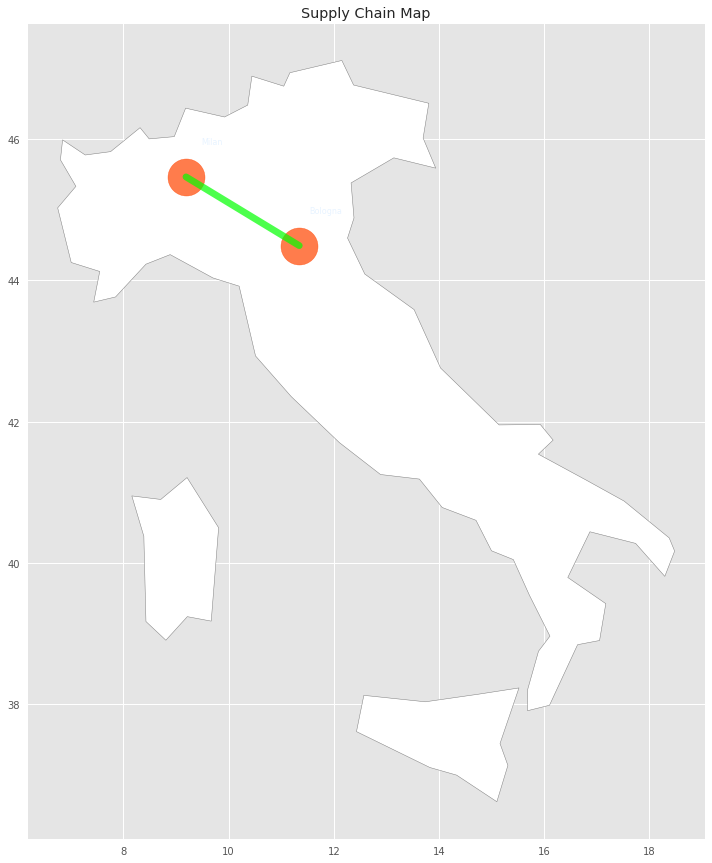

In [7]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    for slat, dlat, slon, dlon, num_flights, src_city, dest_city in zip(Bologna_warehouse["Latitude"], cur_customer["Latitude"], Bologna_warehouse["Longitude"], cur_customer["Longitude"], cur_customer["Demand"], Bologna_warehouse["City"], cur_customer["City"]):
        plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/200, color="lime", alpha=0.7)
        plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.7, s=num_flights)

        plt.text(slon+0.5, slat+0.5, src_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.5, dlat+0.5, dest_city, fontsize=8, color="dodgerblue", alpha=0.1, horizontalalignment='center', verticalalignment='center')

    #plt.savefig("connection-map-geopandas-5.png", dpi=100)
    plt.title("Supply Chain Map")

In [8]:
# Bologna --> initial customers

line_point = LineString([(11.3428,44.4939),(11.3429,44.4938)])  #bologna-bologna
line0 = LineString([(11.3428,44.4939),(9.1900,45.4669)])        #bologna-milano         
line1 = LineString([(11.3428,44.4939),(7.7000,45.0667)])        #bologna-torino
line2 = LineString([(11.3428,44.4939),(8.9340,44.4072)])        #bologna-genoa
line3 = LineString([(11.3428,44.4939),(12.3319,45.4397)])       #bologna-venezia
line4 = LineString([(11.3428,44.4939),(10.9928,45.4386)])       #bologna-verona
line5 = LineString([(11.3428,44.4939),(11.8778,45.4064)])       #bologna-padova
line6 = LineString([(11.3428,44.4939),(13.7703,45.6503)])       #bologna-trieste
line7 = LineString([(11.3428,44.4939),(10.2203,45.5389)])       #bologna-brescia                  
line8 = LineString([(11.3428,44.4939),(10.3280,44.8015)])       #bologna-parma
line9 = LineString([(11.3428,44.4939),(10.9257,44.6458)])       #bologna-modena
line10 = LineString([(11.3428,44.4939),(10.6333,44.7000)])      #bologna-reggio emilia
line11 = LineString([(11.3428,44.4939),(12.1994,44.4178)])      #bologna-ravenna
line12 = LineString([(11.3428,44.4939),(11.6199,44.8353)])      #bologna-ferrara
line13 = LineString([(11.3428,44.4939),(9.2736,45.5836)])       #bologna-monza
line14 = LineString([(11.3428,44.4939),(9.6700,45.6950)])       #bologna-bergamo
line15 = LineString([(11.3428,44.4939),(11.1167,46.0667)])      #bologna-trento                    
line16 = LineString([(11.3428,44.4939),(11.5500,45.5500)])      #bologna-vicenza
line17 = LineString([(11.3428,44.4939),(11.3500,46.5000)])      #bologna-bolzano
line18 = LineString([(11.3428,44.4939),(8.6167,45.4500)])       #bologna-novara
line19 = LineString([(11.3428,44.4939),(9.7000,45.0500)])       #bologna-piacenza
line20 = LineString([(11.3428,44.4939),(13.2333,46.0667)])      #bologna-udine
line21 = LineString([(11.3428,44.4939),(8.6200,44.9133)])       #bologna-alessandria
line22 = LineString([(11.3428,44.4939),(12.2381,45.4906)])      #bologna-mestre
line23 = LineString([(11.3428,44.4939),(12.2422,45.6722)])      #bologna-treviso              
line24 = LineString([(11.3428,44.4939),(8.8518,45.6120)])       #bologna-busto arsizio
line25 = LineString([(11.3428,44.4939),(9.0861,45.8103)])       #bologna-como
line26 = LineString([(11.3428,44.4939),(9.2333,45.5333)])       #bologna-sesto san giovanni
line27 = LineString([(11.3428,44.4939),(8.8333,45.8167)])       #bologna-varese
line28 = LineString([(11.3428,44.4939),(8.2069,44.9000)])       #bologna-asti 
line29 = LineString([(11.3428,44.4939),(9.2167,45.5500)])       #bologna-cinisello

po_x,po_y = line_point.coords.xy
x0,y0 = line0.coords.xy
x1,y1 = line1.coords.xy
x2,y2 = line2.coords.xy
x3,y3 = line3.coords.xy
x4,y4 = line4.coords.xy
x5,y5 = line5.coords.xy
x6,y6 = line6.coords.xy
x7,y7 = line7.coords.xy
x8,y8 = line8.coords.xy
x9,y9 = line9.coords.xy
x10,y10 = line10.coords.xy
x11,y11 = line11.coords.xy
x12,y12 = line12.coords.xy
x13,y13 = line13.coords.xy
x14,y14 = line14.coords.xy
x15,y15 = line15.coords.xy
x16,y16 = line16.coords.xy
x17,y17 = line17.coords.xy
x18,y18 = line18.coords.xy
x19,y19 = line19.coords.xy
x20,y20 = line20.coords.xy
x21,y21 = line21.coords.xy
x22,y22 = line22.coords.xy
x23,y23 = line23.coords.xy
x24,y24 = line24.coords.xy
x25,y25 = line25.coords.xy
x26,y26 = line26.coords.xy
x27,y27 = line27.coords.xy
x28,y28 = line28.coords.xy
x29,y29 = line29.coords.xy


# **DATA VISUALIZATION AS-IS and possible TO-BE**

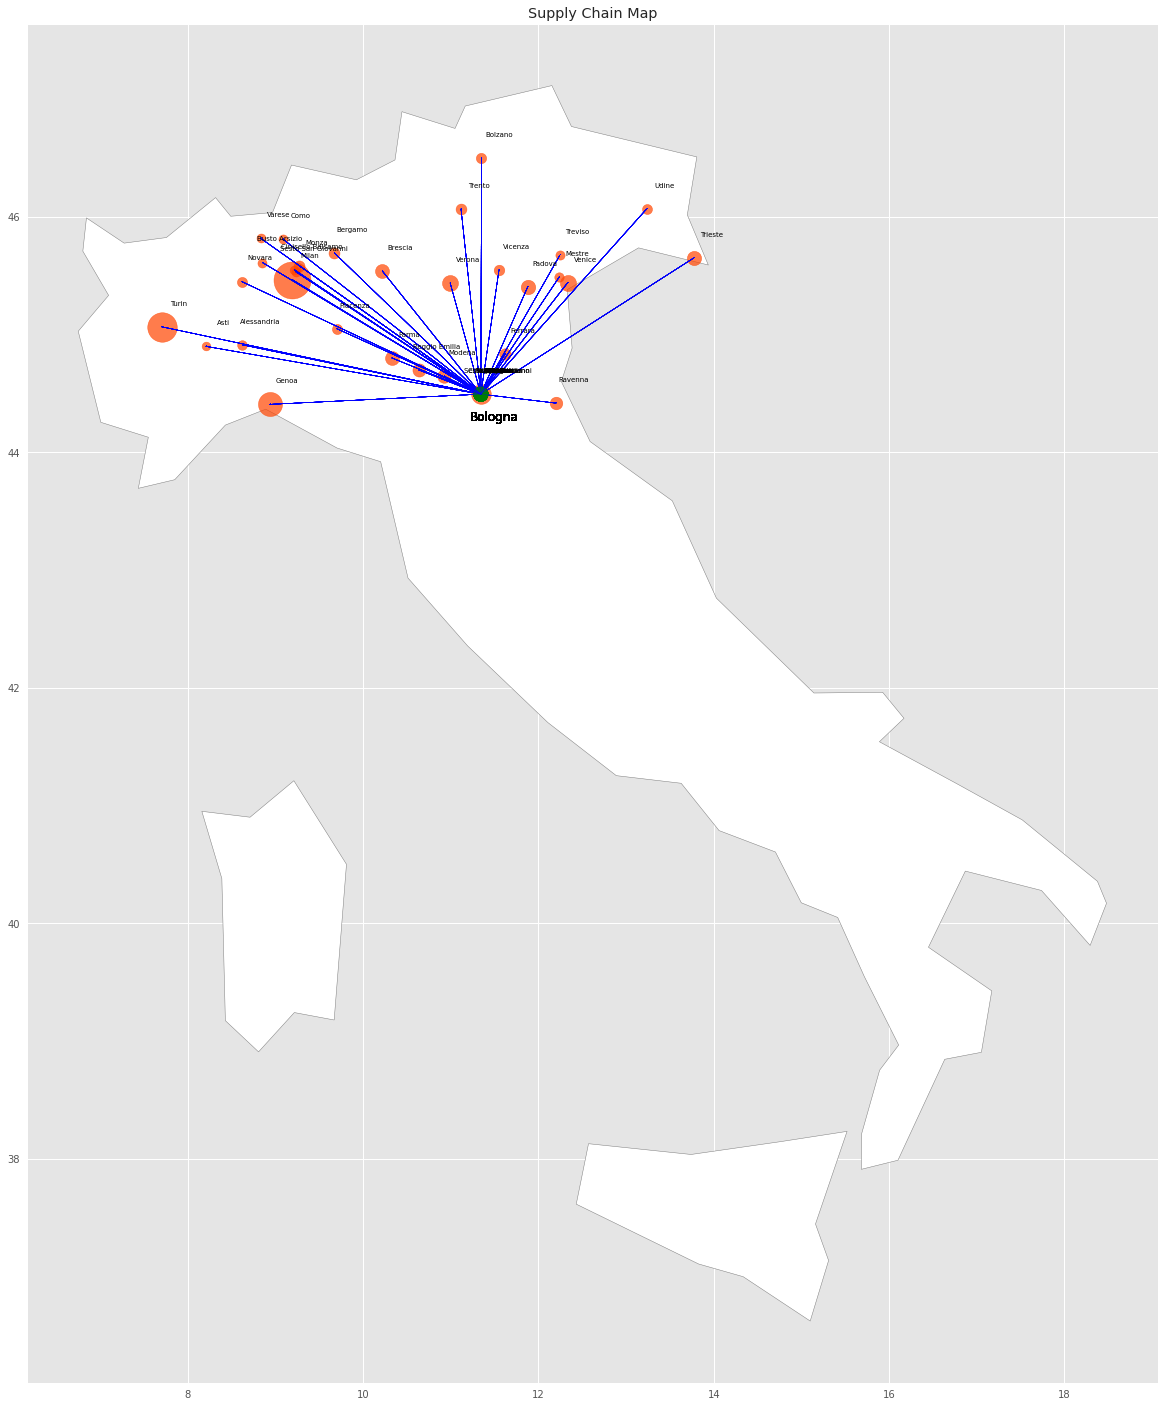

In [15]:
# AS-IS Visualization with Geopandas (one warehouse and 30 customers)

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(25,25), edgecolor="grey", color="white");                                                                   
    
    ## Loop through each flight plotting line depicting flight between source and destination
    for dlat, dlon, demand, city in zip(cur_customer["Latitude"], cur_customer["Longitude"], cur_customer["Demand"], cur_customer["City"]):
        #plt.plot([dlon,dlat], linewidth=3, color="red", alpha=0.7)
        plt.plot(po_x,po_y, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.scatter(dlon,dlat, color="orangered", alpha=0.7, s=demand)
        plt.plot(x0,y0, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x1,y1, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x2,y2, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x3,y3, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x4,y4, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x5,y5, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x6,y6, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x7,y7, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x8,y8, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x9,y9, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x10,y10, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x11,y11, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x12,y12, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x13,y13, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x14,y14, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x15,y15, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x16,y16, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x17,y17, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x18,y18, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x19,y19, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x20,y20, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x21,y21, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x22,y22, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x23,y23, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x24,y24, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x25,y25, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x26,y26, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x27,y27, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x28,y28, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(x29,y29, marker=',',linewidth=0.5, color='blue',alpha=0.5)
        
        plt.text(slon+0.2, slat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon+0.2, dlat+0.2, city, fontsize=7, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(11.5000, 44.3000, 'Bologna', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')

    plt.savefig("additional_materials/figures/1_connection-map-geopandas.png", dpi=400)
    plt.title("Supply Chain Map")

In [10]:
#new customers --> VERSIONE DA SISTEMARE

#warehouse1 (genova) --> #new customers  -->15 customers -> ok

wc_genova = LineString([(8.9340,44.4072),(8.9340,44.4072)]) #genova
wc11 = LineString([(8.9340,44.4072),(9.1900,45.4669)])      #genova-milano
wc12 = LineString([(8.9340,44.4072),(7.7000,45.0667)])      #genova-torino
wc13 = LineString([(8.9340,44.4072),(8.9340,44.4072)])      #genova-genova
wc14 = LineString([(8.9340,44.4072),(9.2736,45.5836)])      #genova-monza
wc15 = LineString([(8.9340,44.4072),(9.6700,45.6950)])      #genova-bergamo
wc16 = LineString([(8.9340,44.4072),(8.6167,45.4500)])      #genova-novara
wc17 = LineString([(8.9340,44.4072),(9.7000,45.0500)])      #genova-piacenza
wc18 = LineString([(8.9340,44.4072),(8.6200,44.9133)])      #genova-alessandria
wc19 = LineString([(8.9340,44.4072),(8.8518,45.6120)])      #genova-busto arstizio
wc110 = LineString([(8.9340,44.4072),(9.0861,45.8103)])     #genova-como
wc111 = LineString([(8.9340,44.4072),(9.2333,45.5333)])     #genova-sesto
wc112 = LineString([(8.9340,44.4072),(8.8333,45.8167)])     #genova-varese
wc113 = LineString([(8.9340,44.4072),(8.2069,44.9000)])     #genova-asti
wc114 = LineString([(8.9340,44.4072),(9.2167,45.5500)])     #genova-cinisello
wc115 = LineString([(8.9340,44.4072),(9.8289,44.1080)])     #genova-la spezia

po_x_genova,po_y_genova = wc_genova.coords.xy
wc11x, wc11y = wc11.coords.xy
wc12x, wc12y = wc12.coords.xy
wc13x, wc13y = wc13.coords.xy
wc14x, wc14y = wc14.coords.xy
wc15x, wc15y = wc15.coords.xy
wc16x, wc16y = wc16.coords.xy
wc17x, wc17y = wc17.coords.xy
wc18x, wc18y = wc18.coords.xy
wc19x, wc19y = wc19.coords.xy
wc110x, wc110y = wc110.coords.xy
wc111x, wc111y = wc111.coords.xy
wc112x, wc112y = wc112.coords.xy
wc113x, wc113y = wc113.coords.xy
wc114x, wc114y = wc114.coords.xy
wc115x, wc115y = wc115.coords.xy

#warehouse2 (bologna)  --> #new customers -->28 customers

wc_bologna = LineString([(11.3428,44.4939),(11.3429,44.4938)])  #bologna
wc21 = LineString([(11.3428,44.4939),(12.3319,45.4397)])      #bologna-venezia
wc22 = LineString([(11.3428,44.4939),(10.9928,45.4386)])       #bologna-verona
wc23 = LineString([(11.3428,44.4939),(11.8778,45.4064)])      #bologna-padova
wc24 = LineString([(11.3428,44.4939),(13.7703,45.6503)])      #bologna-trieste
wc25 = LineString([(11.3428,44.4939),(10.2203,45.5389)])      #bologna-brescia
wc26 = LineString([(11.3428,44.4939),(10.3280,44.8015)])       #bologna-parma
wc27 = LineString([(11.3428,44.4939),(10.9257,44.6458)])      #bologna-modena ok
wc28 = LineString([(11.3428,44.4939),(10.6333,44.7000)])      #bologna-reggio emilia
wc29 = LineString([(11.3428,44.4939),(12.1994,44.4178)])      #bologna-ravenna
wc210 = LineString([(11.3428,44.4939),(11.6199,44.8353)])      #bologna-ferrara
wc211 = LineString([(11.3428,44.4939),(11.1167,46.0667)])     #bologna-trento
wc212 = LineString([(11.3428,44.4939),(11.5500,45.5500)])     #bologna-vicenza
wc213 = LineString([(11.3428,44.4939),(11.3500,46.5000)])     #bologna-bolzano
wc214 = LineString([(11.3428,44.4939),(13.2333,46.0667)])      #bologna-udine
wc215 = LineString([(11.3428,44.4939),(12.2381,45.4906)])     #bologna-mestre
wc216 = LineString([(11.3428,44.4939),(12.2422,45.6722)])     #bologna-treviso
wc217 = LineString([(11.3428,44.4939),(11.2542,43.7714)])     #bologna-firenze                    
wc218 = LineString([(11.3428,44.4939),(11.0966,43.8808)])      #bologna-prato
wc219 = LineString([(11.3428,44.4939),(10.3167,43.5500)])     #bologna-livorno
wc220 = LineString([(11.3428,44.4939),(12.5683,44.0594)])     #bologna-rimini
wc221 = LineString([(11.3428,44.4939),(12.0408,44.2225)])     #bologna-forli
wc222 = LineString([(11.3428,44.4939),(11.8781,43.4631)])     #bologna-arezzo
wc223 = LineString([(11.3428,44.4939),(12.2333,44.1333)])     #bologna-cesena
wc224 = LineString([(11.3428,44.4939),(12.9133,43.9102)])     #bologna-pesaro                    
wc225 = LineString([(11.3428,44.4939),(10.9167,43.9333)])      #bologna-pistoia
wc226 = LineString([(11.3428,44.4939),(10.4000,43.7167)])     #bologna-pisa
wc227 = LineString([(11.3428,44.4939),(10.5167,43.8500)])     #bologna-lucca
                         
wc21x, wc21y = wc21.coords.xy
wc22x, wc22y = wc22.coords.xy
wc23x, wc23y = wc23.coords.xy
wc24x, wc24y = wc24.coords.xy
wc25x, wc25y = wc25.coords.xy
wc26x, wc26y = wc26.coords.xy
wc27x, wc27y = wc27.coords.xy
wc28x, wc28y = wc28.coords.xy
wc29x, wc29y = wc29.coords.xy
wc210x, wc210y = wc210.coords.xy
wc211x, wc211y = wc211.coords.xy
wc212x, wc212y = wc212.coords.xy
wc213x, wc213y = wc213.coords.xy
wc214x, wc214y = wc214.coords.xy
wc215x, wc215y = wc215.coords.xy
wc216x, wc216y = wc216.coords.xy
wc217x, wc217y = wc217.coords.xy
wc218x, wc218y = wc218.coords.xy
wc219x, wc219y = wc219.coords.xy
wc220x, wc220y = wc220.coords.xy
wc221x, wc221y = wc221.coords.xy
wc222x, wc222y = wc222.coords.xy
wc223x, wc223y = wc223.coords.xy
wc224x, wc224y = wc224.coords.xy
wc225x, wc225y = wc225.coords.xy
wc226x, wc226y = wc226.coords.xy
wc227x, wc227y = wc227.coords.xy

#warehouse3 (rome) --> #new customers -->11 customers -> ok

wc_rome = LineString([(12.4828,41.8931),(12.4828,41.8931)])  #rome-rome
wc31 = LineString([(12.4828,41.8931),(14.2500,40.8333)])     #rome-napoli
wc32 = LineString([(12.4828,41.8931),(12.3888,43.1121)])     #rome-perugia
wc33 = LineString([(12.4828,41.8931),(12.9037,41.4676)])     #rome-latina
wc34 = LineString([(12.4828,41.8931),(14.1956,40.9319)])     #rome-Giugliano in Campania
wc35 = LineString([(12.4828,41.8931),(14.2142,42.4643)])     #rome-pescara
wc36 = LineString([(12.4828,41.8931),(12.6500,42.5667)])     #rome-terni
wc37 = LineString([(12.4828,41.8931),(13.5167,43.6167)])     #rome-ancona
wc38 = LineString([(12.4828,41.8931),(11.1089,42.7722)])     #rome-grosseto
wc39 = LineString([(12.4828,41.8931),(14.1222,40.8231)])     #rome-pozzuoli
wc310 = LineString([(12.4828,41.8931),(12.2333,41.7667)])    #rome-fiumicino
                         
po_x_rome,po_y_rome = wc_rome.coords.xy
wc31x, wc31y = wc31.coords.xy
wc32x, wc32y = wc32.coords.xy
wc33x, wc33y = wc33.coords.xy
wc34x, wc34y = wc34.coords.xy
wc35x, wc35y = wc35.coords.xy
wc36x, wc36y = wc36.coords.xy
wc37x, wc37y = wc37.coords.xy
wc38x, wc38y = wc38.coords.xy
wc39x, wc39y = wc39.coords.xy
wc310x, wc310y = wc310.coords.xy

#warehouse4 (andria) --> #new customers --11 customers -> ok

wc_andria = LineString([(16.3083,41.2317),(16.3083,41.2317)])  #andria-andria
wc41 = LineString([(16.3083,41.2317),(16.8667,41.1253)])       #andria-bari
wc42 = LineString([(16.3083,41.2317),(17.2408,40.4181)])       #andria-taranto
wc43 = LineString([(16.3083,41.2317),(15.5519,41.4584)])       #andria-foggia
wc44 = LineString([(16.3083,41.2317),(14.7597,40.6806)])       #andria-salerno
wc45 = LineString([(16.3083,41.2317),(16.3083,41.2317)])       #andria-andria
wc46 = LineString([(16.3083,41.2317),(18.1691,40.3520)])       #andria-lecce
wc47 = LineString([(16.3083,41.2317),(16.2833,41.3167)])       #andria-barletta
wc48 = LineString([(16.3083,41.2317),(17.9458,40.6383)])       #andria-brindisi
wc49 = LineString([(16.3083,41.2317),(14.3953,40.7853)])       #andria-torre del greco
wc410 = LineString([(16.3083,41.2317),(14.3000,40.9000)])      #andria-casoria
wc411 = LineString([(16.3083,41.2317),(14.3333,41.0667)])      #andria-caserta

po_x_andria,po_y_andria = wc_andria.coords.xy
wc41x, wc41y = wc41.coords.xy
wc42x, wc42y = wc42.coords.xy
wc43x, wc43y = wc43.coords.xy
wc44x, wc44y = wc44.coords.xy
wc45x, wc45y = wc45.coords.xy
wc46x, wc46y = wc46.coords.xy
wc47x, wc47y = wc47.coords.xy
wc48x, wc48y = wc48.coords.xy
wc49x, wc49y = wc49.coords.xy
wc410x, wc410y = wc410.coords.xy
wc411x, wc411y = wc411.coords.xy
                         
#warehouse5 (catania) --> #new customers -->7 customers -> ok
                         
wc_catania = LineString([(15.0873,37.5027),(15.0873,37.5027)]) #catania-catania
wc51 = LineString([(15.0873,37.5027),(13.3613,38.1157)])       #catania-palermo
wc52 = LineString([(15.0873,37.5027),(15.5542,38.1936)])       #catania-messina
wc53 = LineString([(15.0873,37.5027),(15.6500,38.1144)])       #catania-reggio calabria
wc54 = LineString([(15.0873,37.5027),(15.2875,37.0692)])       #catania-siracusa
wc55 = LineString([(15.0873,37.5027),(16.5875,38.9100)])       #catania-catanzaro
wc56 = LineString([(15.0873,37.5027),(12.4342,37.7981)])       #catania-marsala
                         
po_x_catania,po_y_catania = wc_catania.coords.xy
wc51x, wc51y = wc51.coords.xy
wc52x, wc52y = wc52.coords.xy
wc53x, wc53y = wc53.coords.xy
wc54x, wc54y = wc54.coords.xy
wc55x, wc55y = wc55.coords.xy
wc56x, wc56y = wc56.coords.xy


#FROM PLANT TO WAREHOUSES
wc_bologna_genova = LineString([(11.3428,44.4939),(8.9340,44.4072)])
wc_bologna_roma = LineString([(11.3428,44.4939),(12.4828,41.8931)])
wc_roma_andria = LineString([(12.4828,41.8931),(16.3083,41.2317)])
wc_roma_catania = LineString([(12.4828,41.8931),(15.0873,37.5027)])
#wc_roma_calabria = LineString([(12.4828,41.8931),(16.2075,40.0000)])
#wc_calabria_catania = LineString([(16.2075,39.9999),(15.0873,37.5027)])

wc_bologna_genovax,wc_bologna_genovay = wc_bologna_genova.coords.xy
wc_bologna_romax,wc_bologna_romay = wc_bologna_roma.coords.xy
wc_roma_andriax,wc_roma_andriay = wc_roma_andria.coords.xy
wc_roma_cataniax,wc_roma_cataniay = wc_roma_catania.coords.xy
#wc_roma_calabriax,wc_roma_calabriay = wc_roma_calabria.coords.xy
#wc_calabria_cataniax,wc_calabria_cataniay = wc_calabria_reggio.coords.xy

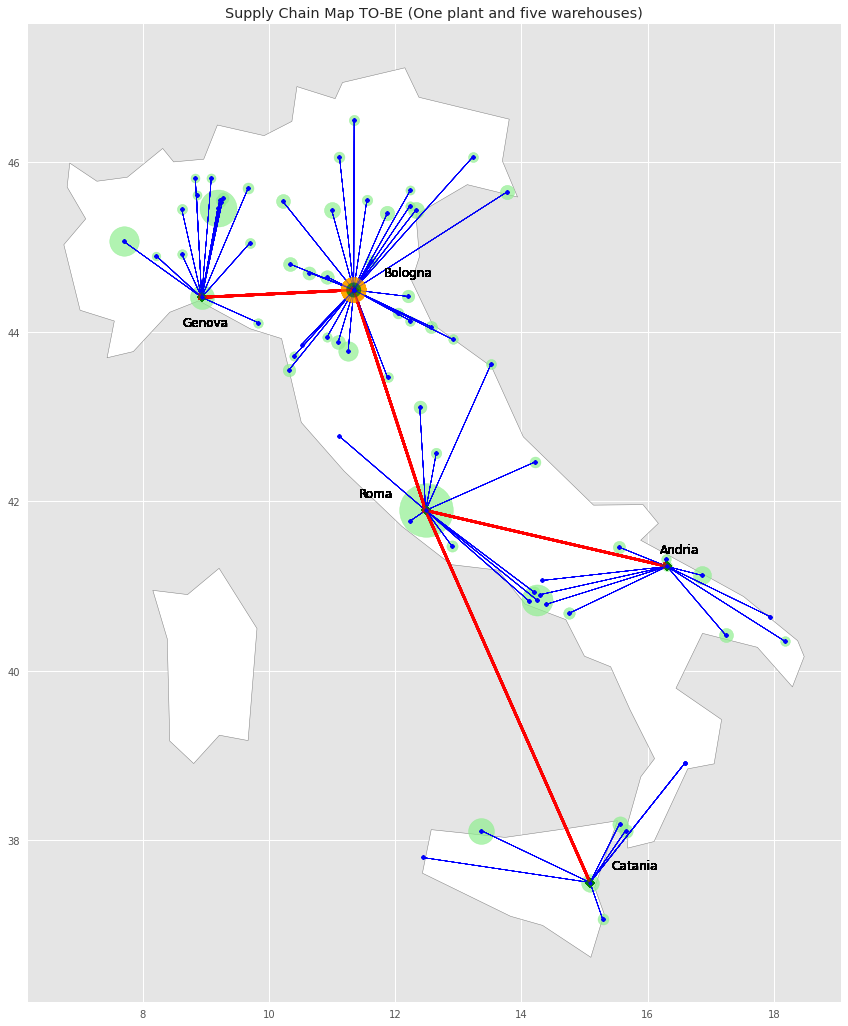

In [12]:
## one plant and 5 warehouse with 71 customers
# TO-BE Visualization with Geopandas 

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(18,18), edgecolor="grey", color="white");                                                                   
    
    ## Loop through each flight plotting line depicting flight between source and destination
    for dlat, dlat1, dlon, dlon1, demand, demand1, city in zip(cur_customer["Latitude"],new_customer["Latitude"], cur_customer["Longitude"],new_customer["Longitude"], cur_customer["Demand"], new_customer["Demand"], cur_customer["City"]):
        #plt.plot([dlon,dlat], linewidth=3, color="red", alpha=0.7)
        plt.plot(po_x,po_y, marker='X',linewidth=25,color="orange", alpha=0.7)
        plt.plot(po_x,po_y, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_genova,po_y_genova, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_rome,po_y_rome, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_andria,po_y_andria, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_catania,po_y_catania, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.scatter(dlon,dlat, color="#90EE90", alpha=0.7, s=demand)
        plt.scatter(dlon1,dlat1, color="#90EE90", alpha=0.7, s=demand1)
        #link beetwen plant and warehouses
        plt.plot(wc_bologna_genovax,wc_bologna_genovay, marker='>',linewidth=2.5, color='red',alpha=0.5)
        plt.plot(wc_bologna_romax,wc_bologna_romay, marker='>',linewidth=2.5, color='red',alpha=0.5)
        plt.plot(wc_roma_andriax,wc_roma_andriay, marker='>',linewidth=2.5, color='red',alpha=0.5)
        plt.plot(wc_roma_cataniax,wc_roma_cataniay,linewidth=2.5, color='red',alpha=0.5)
        #plt.plot(wc_roma_calabriax,wc_roma_calabriay, marker='>',linewidth=2, color='red',alpha=0.5)
        #plt.plot(wc_calabria_cataniax,wc_calabria_cataniay, marker='>',linewidth=2, color='red',alpha=0.5)
        #from genova 
        plt.plot(wc11x, wc11y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc12x, wc12y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc14x, wc14y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc15x, wc15y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc16x, wc16y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc17x, wc17y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc18x, wc18y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc19x, wc19y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc110x, wc110y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc111x, wc111y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc112x, wc112y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc113x, wc113y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc114x, wc114y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc115x, wc115y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from bologna
        plt.plot(wc21x, wc21y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc22x, wc22y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc23x, wc23y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc24x, wc24y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc25x, wc25y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc26x, wc26y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc27x, wc27y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc28x, wc28y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc29x, wc29y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc210x, wc210y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc211x, wc211y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc212x, wc212y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc213x, wc213y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc214x, wc214y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc215x, wc215y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc216x, wc216y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc217x, wc217y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc218x, wc218y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc219x, wc219y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc220x, wc220y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc221x, wc221y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc222x, wc222y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc223x, wc223y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc224x, wc224y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc225x, wc225y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc226x, wc226y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc227x, wc227y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from rome
        plt.plot(wc31x, wc31y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc32x, wc32y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc33x, wc33y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc34x, wc34y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc35x, wc35y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc36x, wc36y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc37x, wc37y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc38x, wc38y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc39x, wc39y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc310x, wc310y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from andria
        plt.plot(wc41x, wc41y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc42x, wc42y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc43x, wc43y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc44x, wc44y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc45x, wc45y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc46x, wc46y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc47x, wc47y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc48x, wc48y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc49x, wc49y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc410x, wc410y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc411x, wc411y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from catania
        plt.plot(wc51x, wc51y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc52x, wc52y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc53x, wc53y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc54x, wc54y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc55x, wc55y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc55x, wc55y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc56x, wc56y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        
        plt.text(9.000,43.8072+0.3,'Genova', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(12.2000, 44.4938+0.2, 'Bologna', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(11.5000+0.2, 41.8931+0.2, 'Roma', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(16.3083+0.2, 41.2317+0.2, 'Andria', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(15.5873+0.2, 37.5027+0.2, 'Catania', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        
    plt.savefig("additional_materials/figures/2_connection-map-geopandas.png", dpi=400)
    plt.title("Supply Chain Map TO-BE (One plant and five warehouses)")

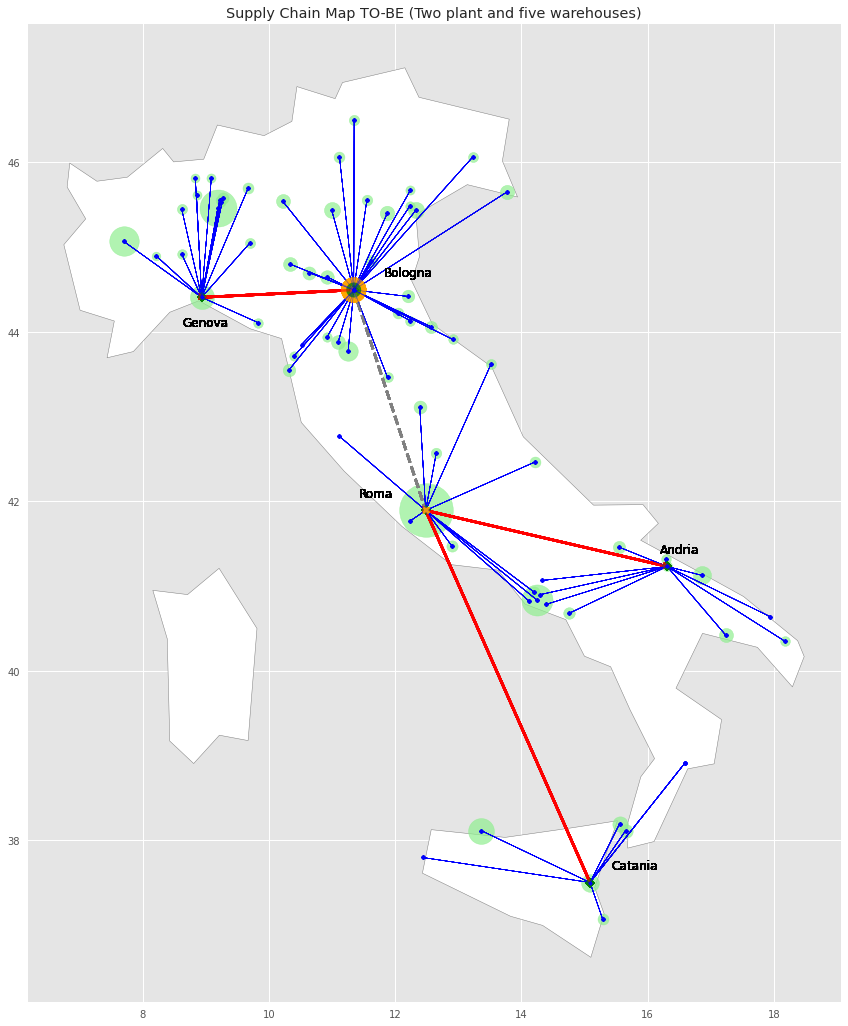

In [13]:
## two plant and 5 warehouse with 71 customers
# TO-BE Visualization with Geopandas 

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "Italy"].plot(figsize=(18,18), edgecolor="grey", color="white");                                                                   
    
    ## Loop through each flight plotting line depicting flight between source and destination
    for dlat, dlat1, dlon, dlon1, demand, demand1, city in zip(cur_customer["Latitude"],new_customer["Latitude"], cur_customer["Longitude"],new_customer["Longitude"], cur_customer["Demand"], new_customer["Demand"], cur_customer["City"]):
        #plt.plot([dlon,dlat], linewidth=3, color="red", alpha=0.7)
        plt.plot(po_x,po_y, marker='X',linewidth=25,color="orange", alpha=0.7)
        plt.plot(po_x,po_y, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_genova,po_y_genova, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_rome,po_y_rome, marker='X',linewidth=25,color="orange", alpha=0.7)
        plt.plot(po_x_rome,po_y_rome, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_andria,po_y_andria, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.plot(po_x_catania,po_y_catania, marker='D',linewidth=15,color="green", alpha=0.7)
        plt.scatter(dlon,dlat, color="#90EE90", alpha=0.7, s=demand)
        plt.scatter(dlon1,dlat1, color="#90EE90", alpha=0.7, s=demand1)
        #link beetwen plant and warehouses
        plt.plot(wc_bologna_genovax,wc_bologna_genovay, marker='>',linewidth=2.5, color='red',alpha=0.5)
        plt.plot(wc_bologna_romax,wc_bologna_romay, marker='>',linewidth=2.5,linestyle='dashed', color='gray',alpha=0.5)
        plt.plot(wc_roma_andriax,wc_roma_andriay, marker='>',linewidth=2.5, color='red',alpha=0.5)
        plt.plot(wc_roma_cataniax,wc_roma_cataniay,linewidth=2.5, color='red',alpha=0.5)
        #plt.plot(wc_roma_calabriax,wc_roma_calabriay, marker='>',linewidth=2, color='red',alpha=0.5)
        #plt.plot(wc_calabria_cataniax,wc_calabria_cataniay, marker='>',linewidth=2, color='red',alpha=0.5)
        #from genova 
        plt.plot(wc11x, wc11y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc12x, wc12y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc14x, wc14y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc15x, wc15y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc16x, wc16y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc17x, wc17y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc18x, wc18y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc19x, wc19y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc110x, wc110y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc111x, wc111y, marker='.',linewidth=0.5, color='blue',alpha=0.5)  
        plt.plot(wc112x, wc112y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc113x, wc113y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc114x, wc114y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc115x, wc115y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from bologna
        plt.plot(wc21x, wc21y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc22x, wc22y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc23x, wc23y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc24x, wc24y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc25x, wc25y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc26x, wc26y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc27x, wc27y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc28x, wc28y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc29x, wc29y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc210x, wc210y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc211x, wc211y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc212x, wc212y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc213x, wc213y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc214x, wc214y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc215x, wc215y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc216x, wc216y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc217x, wc217y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc218x, wc218y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc219x, wc219y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc220x, wc220y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc221x, wc221y, marker='.',linewidth=0.5, color='blue',alpha=0.5)   
        plt.plot(wc222x, wc222y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc223x, wc223y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc224x, wc224y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc225x, wc225y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc226x, wc226y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc227x, wc227y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from rome
        plt.plot(wc31x, wc31y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc32x, wc32y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc33x, wc33y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc34x, wc34y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc35x, wc35y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc36x, wc36y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc37x, wc37y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc38x, wc38y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc39x, wc39y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc310x, wc310y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from andria
        plt.plot(wc41x, wc41y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc42x, wc42y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc43x, wc43y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc44x, wc44y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc45x, wc45y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc46x, wc46y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc47x, wc47y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc48x, wc48y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc49x, wc49y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc410x, wc410y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc411x, wc411y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        #from catania
        plt.plot(wc51x, wc51y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc52x, wc52y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc53x, wc53y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc54x, wc54y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc55x, wc55y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc55x, wc55y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        plt.plot(wc56x, wc56y, marker='.',linewidth=0.5, color='blue',alpha=0.5)
        
        plt.text(9.000,43.8072+0.3,'Genova', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(12.2000, 44.4938+0.2, 'Bologna', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(11.5000+0.2, 41.8931+0.2, 'Roma', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(16.3083+0.2, 41.2317+0.2, 'Andria', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        plt.text(15.5873+0.2, 37.5027+0.2, 'Catania', fontsize=12, color="black", alpha=1, horizontalalignment='center', verticalalignment='center')
        
    plt.plot(po_x_rome,po_y_rome, marker='X',linewidth=25,color="orange", alpha=0.7)
    
    plt.savefig("additional_materials/figures/3_connection-map-geopandas.png", dpi=400)
    plt.title("Supply Chain Map TO-BE (Two plant and five warehouses)")